In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# Create sample sales data
def generate_sample_sales_data():
    np.random.seed(42)
    
    # Generate dates for the past year
    dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
    
    # Products
    products = ['Laptop', 'Smartphone', 'Tablet', 'Headphones', 'Monitor', 
                'Keyboard', 'Mouse', 'Printer', 'Camera', 'Smartwatch']
    
    # Regions
    regions = ['North', 'South', 'East', 'West']
    
    # Sales channels
    channels = ['Online', 'Retail', 'Wholesale']
    
    # Generate sample data
    data = []
    for date in dates:
        for _ in range(np.random.randint(50, 100)):  # Daily transactions
            product = np.random.choice(products)
            region = np.random.choice(regions)
            channel = np.random.choice(channels)
            
            # Product-specific pricing
            base_prices = {
                'Laptop': 800, 'Smartphone': 600, 'Tablet': 400, 
                'Headphones': 100, 'Monitor': 300, 'Keyboard': 50,
                'Mouse': 25, 'Printer': 200, 'Camera': 450, 'Smartwatch': 250
            }
            
            quantity = np.random.randint(1, 5)
            unit_price = base_prices[product] * np.random.uniform(0.9, 1.1)
            total_sales = quantity * unit_price
            
            data.append({
                'Date': date,
                'Product': product,
                'Region': region,
                'Sales_Channel': channel,
                'Quantity': quantity,
                'Unit_Price': unit_price,
                'Total_Sales': total_sales,
                'Customer_ID': f"CUST{np.random.randint(1000, 9999)}"
            })
    
    return pd.DataFrame(data)

# Generate and save sample data
sales_df = generate_sample_sales_data()
sales_df.to_csv('sales_data.csv', index=False)

# Load the CSV file
df = pd.read_csv('sales_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

print("📊 Data loaded successfully!")
print(f"Dataset shape: {df.shape}")

📊 Data loaded successfully!
Dataset shape: (27164, 8)


In [3]:
# Initial data exploration
print("🔍 DATA OVERVIEW")
print("="*50)
print(df.info())
print("\n" + "="*50)
print("FIRST 5 ROWS:")
print(df.head())

🔍 DATA OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27164 entries, 0 to 27163
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           27164 non-null  datetime64[ns]
 1   Product        27164 non-null  object        
 2   Region         27164 non-null  object        
 3   Sales_Channel  27164 non-null  object        
 4   Quantity       27164 non-null  int64         
 5   Unit_Price     27164 non-null  float64       
 6   Total_Sales    27164 non-null  float64       
 7   Customer_ID    27164 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.7+ MB
None

FIRST 5 ROWS:
        Date     Product Region Sales_Channel  Quantity  Unit_Price  \
0 2023-01-01  Headphones  North     Wholesale         3  105.593820   
1 2023-01-01  Smartwatch   East     Wholesale         3  247.962445   
2 2023-01-01    Keyboard  North        Retail       

In [4]:
# Basic statistics
print("📈 BASIC STATISTICS")
print("="*50)
print(df.describe())

📈 BASIC STATISTICS
                                Date      Quantity    Unit_Price   Total_Sales
count                          27164  27164.000000  27164.000000  27164.000000
mean   2023-07-02 10:37:40.403475200      2.486489    317.677106    787.612302
min              2023-01-01 00:00:00      1.000000     22.501390     22.515256
25%              2023-04-01 00:00:00      1.000000     99.591770    207.205893
50%              2023-07-03 00:00:00      2.000000    272.098798    577.580026
75%              2023-10-04 00:00:00      3.000000    450.487952   1149.991035
max              2023-12-31 00:00:00      4.000000    879.960714   3517.071680
std                              NaN      1.119158    238.516149    736.189112


In [5]:
# Check for missing values
print("🔎 MISSING VALUES CHECK")
print("="*50)
print(df.isnull().sum())

🔎 MISSING VALUES CHECK
Date             0
Product          0
Region           0
Sales_Channel    0
Quantity         0
Unit_Price       0
Total_Sales      0
Customer_ID      0
dtype: int64


In [9]:
# Data cleaning
print("🧹 DATA CLEANING")
print("="*50)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")

# Add additional date features
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['DayOfWeek'] = df['Date'].dt.day_name()
df['WeekNumber'] = df['Date'].dt.isocalendar().week

print("✅ Data cleaning completed!")
print(f"Final dataset shape: {df.shape}")

🧹 DATA CLEANING
Number of duplicate rows: 0
✅ Data cleaning completed!
Final dataset shape: (27164, 12)


In [6]:
# Overall sales performance
print("💰 OVERALL SALES PERFORMANCE")
print("="*50)

total_sales = df['Total_Sales'].sum()
total_quantity = df['Quantity'].sum()
total_transactions = len(df)
avg_transaction_value = df['Total_Sales'].mean()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Quantity Sold: {total_quantity:,}")
print(f"Total Transactions: {total_transactions:,}")
print(f"Average Transaction Value: ${avg_transaction_value:.2f}")

💰 OVERALL SALES PERFORMANCE
Total Sales: $21,394,700.58
Total Quantity Sold: 67,543
Total Transactions: 27,164
Average Transaction Value: $787.61


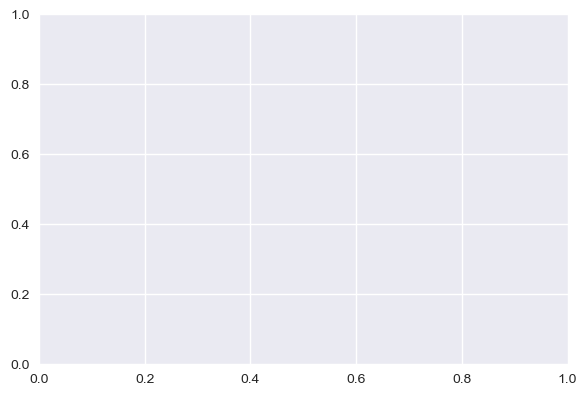

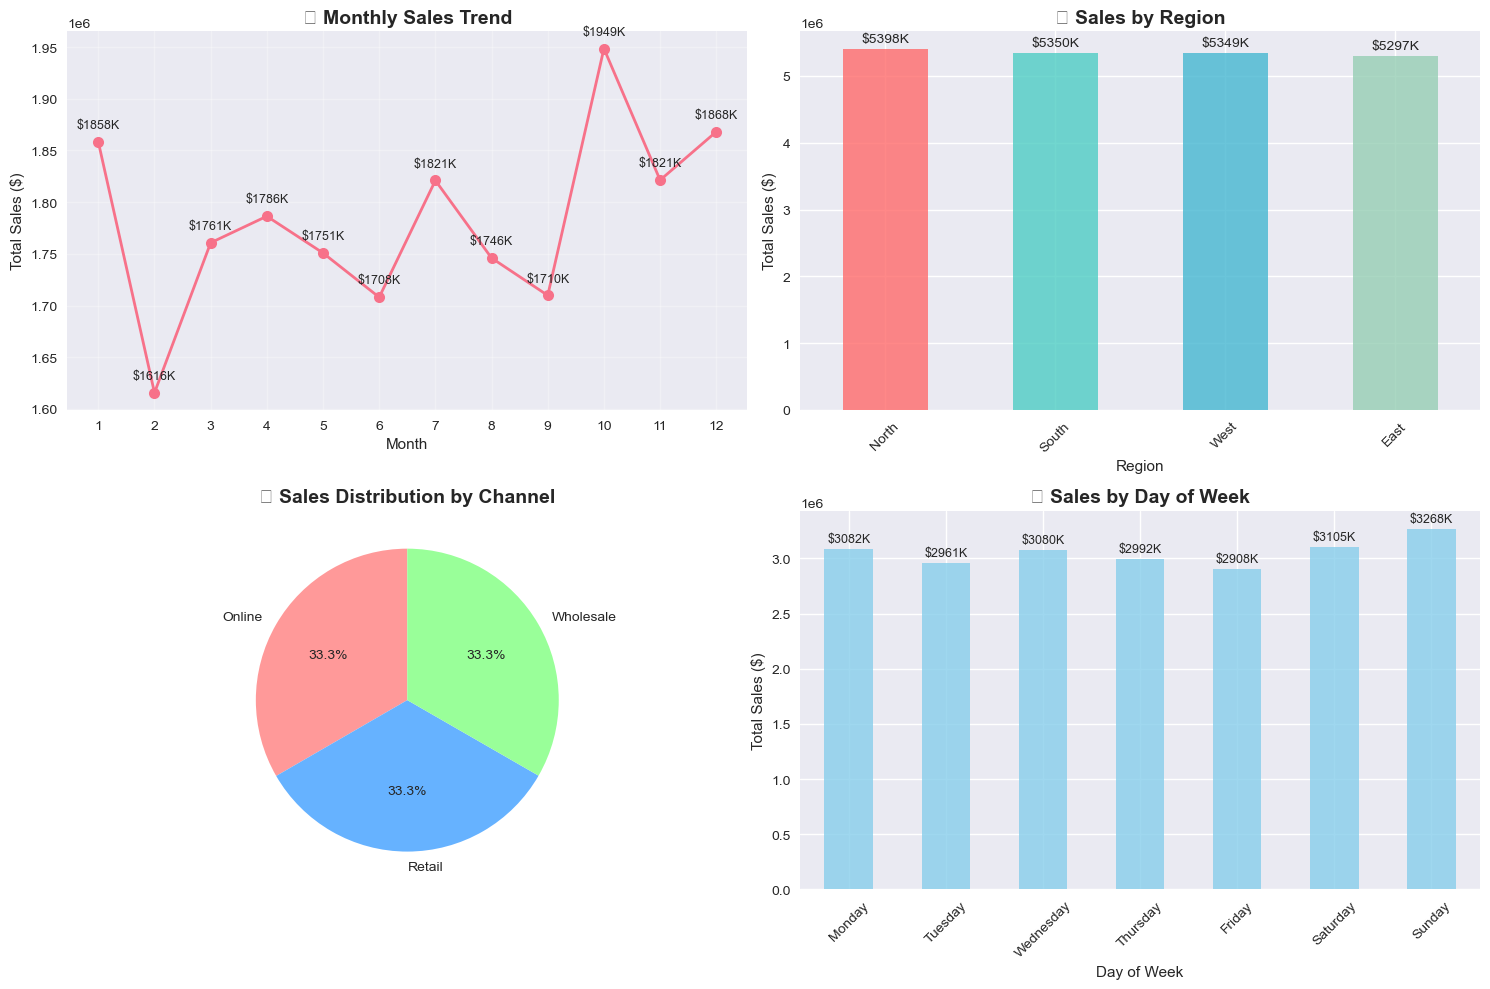

In [10]:
# Monthly sales trend
plt.figure(figsize=(15, 10))

# Plot 1: Monthly Sales Trend
plt.subplot(2, 2, 1)
monthly_sales = df.groupby('Month')['Total_Sales'].sum()
monthly_sales.plot(kind='line', marker='o', linewidth=2, markersize=8)
plt.title('📈 Monthly Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13))

# Add value labels on points
for month, sales in monthly_sales.items():
    plt.annotate(f'${sales/1000:.0f}K', 
                (month, sales), 
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center', 
                fontsize=9)

# Plot 2: Sales by Region
plt.subplot(2, 2, 2)
region_sales = df.groupby('Region')['Total_Sales'].sum().sort_values(ascending=False)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
region_sales.plot(kind='bar', color=colors, alpha=0.8)
plt.title('🏢 Sales by Region', fontsize=14, fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)

# Add value labels on bars
for i, v in enumerate(region_sales):
    plt.annotate(f'${v/1000:.0f}K', 
                (i, v), 
                textcoords="offset points", 
                xytext=(0,5), 
                ha='center', 
                fontsize=10)

# Plot 3: Sales by Channel
plt.subplot(2, 2, 3)
channel_sales = df.groupby('Sales_Channel')['Total_Sales'].sum()
plt.pie(channel_sales.values, labels=channel_sales.index, autopct='%1.1f%%', 
        startangle=90, colors=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('🛒 Sales Distribution by Channel', fontsize=14, fontweight='bold')

# Plot 4: Daily Sales Pattern
plt.subplot(2, 2, 4)
daily_sales = df.groupby('DayOfWeek')['Total_Sales'].sum()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = daily_sales.reindex(days_order)
daily_sales.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('📅 Sales by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)

# Add value labels on bars
for i, v in enumerate(daily_sales):
    plt.annotate(f'${v/1000:.0f}K', 
                (i, v), 
                textcoords="offset points", 
                xytext=(0,5), 
                ha='center', 
                fontsize=9)

plt.tight_layout()
plt.show()

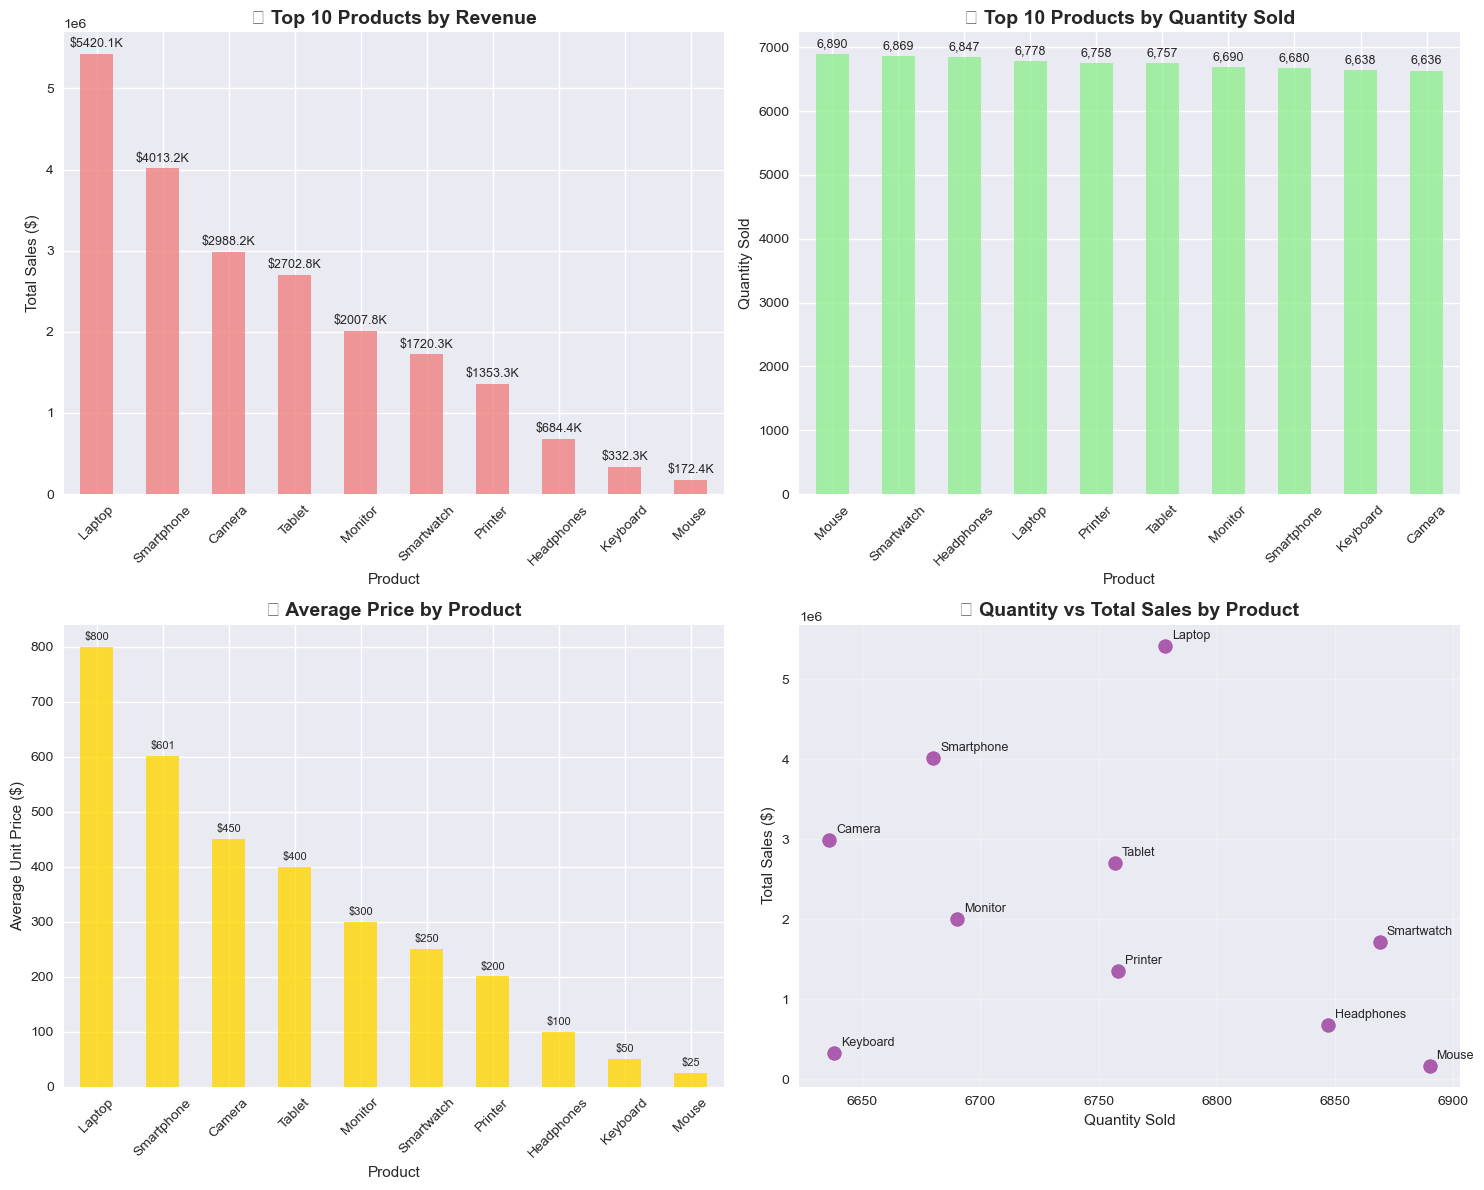

In [11]:
# Product analysis
plt.figure(figsize=(15, 12))

# Plot 1: Top Selling Products by Revenue
plt.subplot(2, 2, 1)
product_sales = df.groupby('Product')['Total_Sales'].sum().sort_values(ascending=False)
product_sales.head(10).plot(kind='bar', color='lightcoral', alpha=0.8)
plt.title('🏆 Top 10 Products by Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)

# Add value labels
for i, v in enumerate(product_sales.head(10)):
    plt.annotate(f'${v/1000:.1f}K', 
                (i, v), 
                textcoords="offset points", 
                xytext=(0,5), 
                ha='center', 
                fontsize=9)

# Plot 2: Top Selling Products by Quantity
plt.subplot(2, 2, 2)
product_quantity = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
product_quantity.head(10).plot(kind='bar', color='lightgreen', alpha=0.8)
plt.title('📦 Top 10 Products by Quantity Sold', fontsize=14, fontweight='bold')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)

# Add value labels
for i, v in enumerate(product_quantity.head(10)):
    plt.annotate(f'{v:,}', 
                (i, v), 
                textcoords="offset points", 
                xytext=(0,5), 
                ha='center', 
                fontsize=9)

# Plot 3: Average Price by Product
plt.subplot(2, 2, 3)
avg_price = df.groupby('Product')['Unit_Price'].mean().sort_values(ascending=False)
avg_price.plot(kind='bar', color='gold', alpha=0.8)
plt.title('💰 Average Price by Product', fontsize=14, fontweight='bold')
plt.xlabel('Product')
plt.ylabel('Average Unit Price ($)')
plt.xticks(rotation=45)

# Add value labels
for i, v in enumerate(avg_price):
    plt.annotate(f'${v:.0f}', 
                (i, v), 
                textcoords="offset points", 
                xytext=(0,5), 
                ha='center', 
                fontsize=8)

# Plot 4: Product Sales Distribution
plt.subplot(2, 2, 4)
product_performance = df.groupby('Product').agg({
    'Total_Sales': 'sum',
    'Quantity': 'sum'
}).sort_values('Total_Sales', ascending=False)

plt.scatter(product_performance['Quantity'], 
           product_performance['Total_Sales'], 
           s=100, alpha=0.6, color='purple')

# Add product labels
for product, row in product_performance.iterrows():
    plt.annotate(product, 
                (row['Quantity'], row['Total_Sales']),
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=9)

plt.title('📊 Quantity vs Total Sales by Product', fontsize=14, fontweight='bold')
plt.xlabel('Quantity Sold')
plt.ylabel('Total Sales ($)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
# Advanced groupby analysis
print("📊 ADVANCED ANALYTICS WITH GROUPBY")
print("="*50)

# Sales by Region and Channel
region_channel_sales = df.groupby(['Region', 'Sales_Channel'])['Total_Sales'].sum().unstack()
print("Sales by Region and Channel:")
print(region_channel_sales)
print()

# Monthly growth rate
monthly_growth = df.groupby('Month')['Total_Sales'].sum().pct_change() * 100
print("Monthly Growth Rate (%):")
print(monthly_growth)
print()

# Top performing products by region
top_products_by_region = df.groupby(['Region', 'Product'])['Total_Sales'].sum()
print("Top Product in Each Region:")
for region in df['Region'].unique():
    top_product = top_products_by_region[region].idxmax()
    top_sales = top_products_by_region[region].max()
    print(f"{region}: {top_product} (${top_sales:,.2f})")

📊 ADVANCED ANALYTICS WITH GROUPBY
Sales by Region and Channel:
Sales_Channel        Online        Retail     Wholesale
Region                                                 
East           1.739352e+06  1.836039e+06  1.722042e+06
North          1.796066e+06  1.770024e+06  1.831592e+06
South          1.746779e+06  1.779250e+06  1.824086e+06
West           1.852098e+06  1.748056e+06  1.749317e+06

Monthly Growth Rate (%):
Month
1           NaN
2    -13.057055
3      8.978090
4      1.456768
5     -1.989846
6     -2.445604
7      6.613348
8     -4.118143
9     -2.071161
10    13.961918
11    -6.528531
12     2.569596
Name: Total_Sales, dtype: float64

Top Product in Each Region:
North: Laptop ($1,377,410.32)
East: Laptop ($1,366,041.04)
West: Laptop ($1,352,466.93)
South: Laptop ($1,324,169.18)


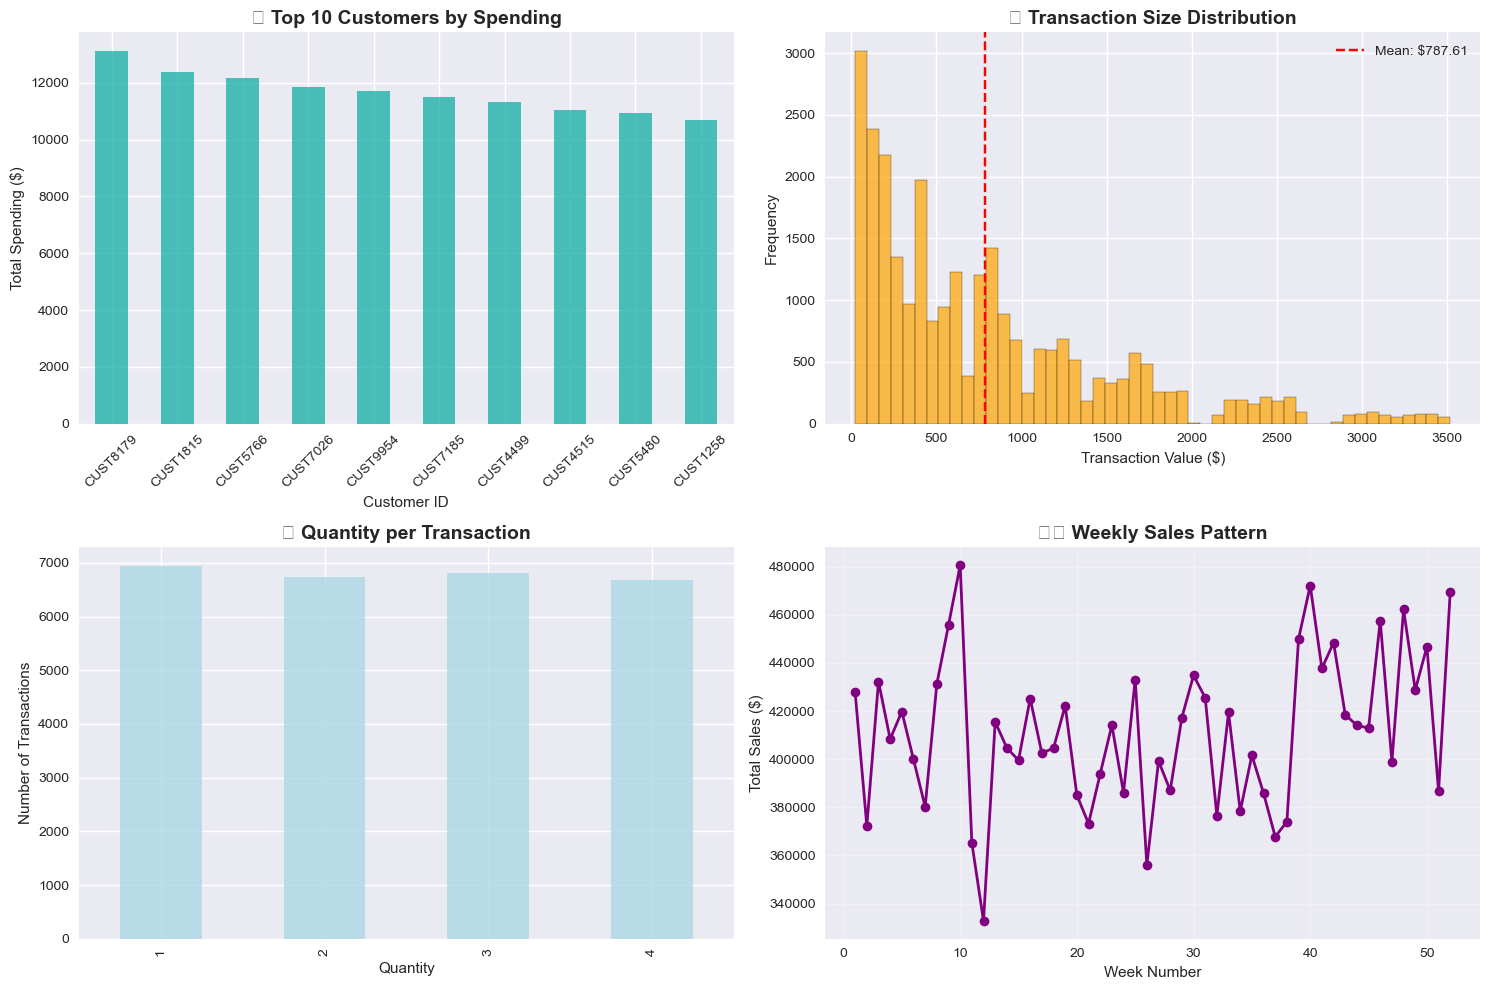

In [13]:
# Customer analysis
plt.figure(figsize=(15, 10))

# Plot 1: Top customers by spending
plt.subplot(2, 2, 1)
top_customers = df.groupby('Customer_ID')['Total_Sales'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', color='lightseagreen', alpha=0.8)
plt.title('👥 Top 10 Customers by Spending', fontsize=14, fontweight='bold')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending ($)')
plt.xticks(rotation=45)

# Plot 2: Transaction size distribution
plt.subplot(2, 2, 2)
plt.hist(df['Total_Sales'], bins=50, color='orange', alpha=0.7, edgecolor='black')
plt.title('📊 Transaction Size Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Transaction Value ($)')
plt.ylabel('Frequency')
plt.axvline(df['Total_Sales'].mean(), color='red', linestyle='--', 
            label=f'Mean: ${df["Total_Sales"].mean():.2f}')
plt.legend()

# Plot 3: Quantity distribution
plt.subplot(2, 2, 3)
quantity_dist = df['Quantity'].value_counts().sort_index()
quantity_dist.plot(kind='bar', color='lightblue', alpha=0.8)
plt.title('📦 Quantity per Transaction', fontsize=14, fontweight='bold')
plt.xlabel('Quantity')
plt.ylabel('Number of Transactions')

# Plot 4: Weekly sales pattern
plt.subplot(2, 2, 4)
weekly_sales = df.groupby('WeekNumber')['Total_Sales'].sum()
plt.plot(weekly_sales.index, weekly_sales.values, marker='o', linewidth=2, color='purple')
plt.title('🗓️ Weekly Sales Pattern', fontsize=14, fontweight='bold')
plt.xlabel('Week Number')
plt.ylabel('Total Sales ($)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [14]:
# Calculate key metrics
print("🎯 KEY PERFORMANCE INDICATORS (KPIs)")
print("="*50)

# Basic KPIs
total_revenue = df['Total_Sales'].sum()
avg_order_value = df['Total_Sales'].mean()
total_orders = len(df)
unique_customers = df['Customer_ID'].nunique()

# Advanced KPIs
avg_items_per_order = df['Quantity'].mean()
revenue_per_customer = total_revenue / unique_customers

print(f"💰 Total Revenue: ${total_revenue:,.2f}")
print(f"📦 Average Order Value: ${avg_order_value:.2f}")
print(f"🛒 Total Orders: {total_orders:,}")
print(f"👥 Unique Customers: {unique_customers:,}")
print(f"📊 Average Items per Order: {avg_items_per_order:.2f}")
print(f"💳 Revenue per Customer: ${revenue_per_customer:.2f}")

# Monthly KPIs
monthly_kpis = df.groupby('Month').agg({
    'Total_Sales': ['sum', 'mean'],
    'Customer_ID': 'nunique',
    'Quantity': 'sum'
}).round(2)

monthly_kpis.columns = ['Monthly_Revenue', 'Avg_Order_Value', 'Unique_Customers', 'Total_Quantity']
print("\n📈 Monthly KPIs:")
print(monthly_kpis)

🎯 KEY PERFORMANCE INDICATORS (KPIs)
💰 Total Revenue: $21,394,700.58
📦 Average Order Value: $787.61
🛒 Total Orders: 27,164
👥 Unique Customers: 8,555
📊 Average Items per Order: 2.49
💳 Revenue per Customer: $2500.84

📈 Monthly KPIs:
       Monthly_Revenue  Avg_Order_Value  Unique_Customers  Total_Quantity
Month                                                                    
1           1858312.13           783.11              2074            5815
2           1615671.29           782.41              1831            5156
3           1760727.71           774.63              2000            5616
4           1786377.42           779.06              2017            5687
5           1750831.26           779.19              1992            5502
6           1708012.86           786.74              1952            5417
7           1820969.70           787.62              2018            5745
8           1745979.56           773.58              2000            5598
9           1709817.51        

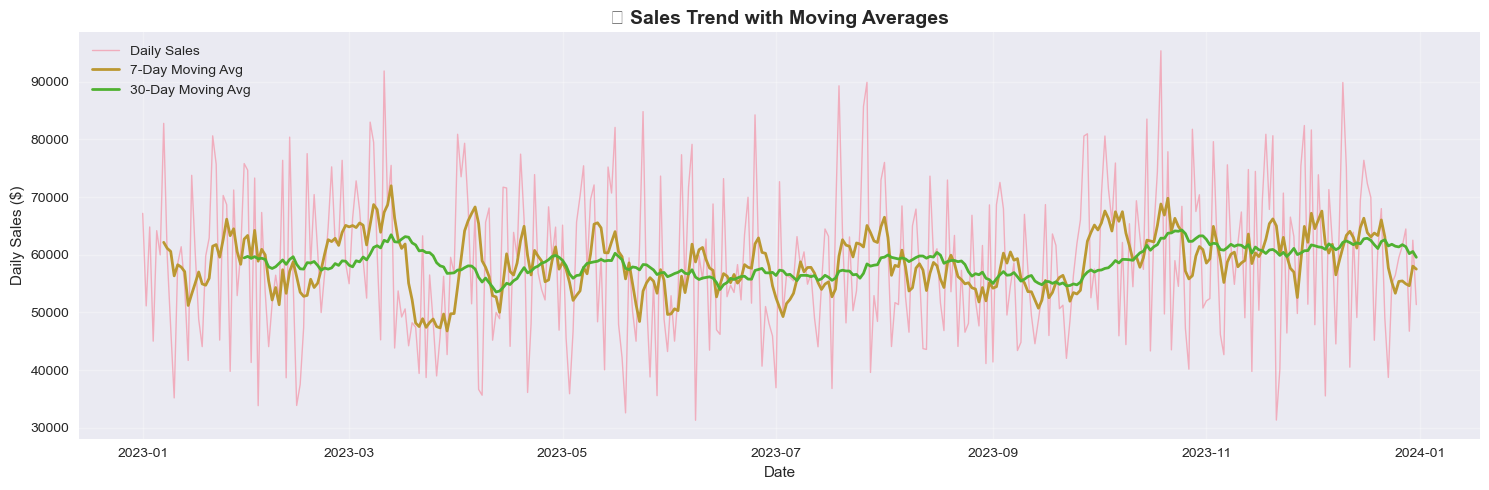

In [15]:
# Simple sales forecasting using moving averages
plt.figure(figsize=(15, 5))

# Daily sales with moving average
daily_sales_ts = df.groupby('Date')['Total_Sales'].sum()

# Calculate 7-day and 30-day moving averages
daily_sales_ts_7d = daily_sales_ts.rolling(window=7).mean()
daily_sales_ts_30d = daily_sales_ts.rolling(window=30).mean()

plt.plot(daily_sales_ts.index, daily_sales_ts.values, label='Daily Sales', alpha=0.5, linewidth=1)
plt.plot(daily_sales_ts_7d.index, daily_sales_ts_7d.values, label='7-Day Moving Avg', linewidth=2)
plt.plot(daily_sales_ts_30d.index, daily_sales_ts_30d.values, label='30-Day Moving Avg', linewidth=2)

plt.title('📈 Sales Trend with Moving Averages', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Daily Sales ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [16]:
# Generate summary insights
print("🎉 DATA ANALYSIS SUMMARY & INSIGHTS")
print("="*60)

# Top insights
best_month = df.groupby('Month')['Total_Sales'].sum().idxmax()
best_region = df.groupby('Region')['Total_Sales'].sum().idxmax()
best_product = df.groupby('Product')['Total_Sales'].sum().idxmax()
best_channel = df.groupby('Sales_Channel')['Total_Sales'].sum().idxmax()

print("🏆 TOP PERFORMERS:")
print(f"• Best Month: Month {best_month}")
print(f"• Best Region: {best_region}")
print(f"• Best Product: {best_product}")
print(f"• Best Channel: {best_channel}")

# Growth insights
q1_sales = df[df['Quarter'] == 1]['Total_Sales'].sum()
q4_sales = df[df['Quarter'] == 4]['Total_Sales'].sum()
growth_rate = ((q4_sales - q1_sales) / q1_sales) * 100

print(f"\n📈 QUARTERLY GROWTH: {growth_rate:+.1f}% (Q1 to Q4)")

# Customer insights
avg_customer_value = df.groupby('Customer_ID')['Total_Sales'].sum().mean()
print(f"\n👥 CUSTOMER INSIGHTS:")
print(f"• Average Customer Lifetime Value: ${avg_customer_value:.2f}")
print(f"• Most Popular Day: {df['DayOfWeek'].mode()[0]}")
print(f"• Average Items per Transaction: {df['Quantity'].mean():.1f}")

print("\n💡 RECOMMENDATIONS:")
print("1. Focus marketing efforts on the top-performing region and channel")
print("2. Increase inventory for best-selling products")
print("3. Analyze reasons for seasonal trends to optimize staffing")
print("4. Implement customer loyalty program for high-value customers")
print("5. Explore opportunities in underperforming regions/channels")

🎉 DATA ANALYSIS SUMMARY & INSIGHTS
🏆 TOP PERFORMERS:
• Best Month: Month 10
• Best Region: North
• Best Product: Laptop
• Best Channel: Online

📈 QUARTERLY GROWTH: +7.7% (Q1 to Q4)

👥 CUSTOMER INSIGHTS:
• Average Customer Lifetime Value: $2500.84
• Most Popular Day: Sunday
• Average Items per Transaction: 2.5

💡 RECOMMENDATIONS:
1. Focus marketing efforts on the top-performing region and channel
2. Increase inventory for best-selling products
3. Analyze reasons for seasonal trends to optimize staffing
4. Implement customer loyalty program for high-value customers
5. Explore opportunities in underperforming regions/channels


In [17]:
# Export key metrics to CSV
print("💾 EXPORTING RESULTS...")

# Summary statistics
summary_stats = df.describe()
summary_stats.to_csv('sales_summary_statistics.csv')

# Top products
top_products = df.groupby('Product').agg({
    'Total_Sales': ['sum', 'count'],
    'Quantity': 'sum',
    'Unit_Price': 'mean'
}).round(2)

top_products.columns = ['Total_Revenue', 'Transaction_Count', 'Total_Quantity', 'Avg_Unit_Price']
top_products = top_products.sort_values('Total_Revenue', ascending=False)
top_products.to_csv('product_performance.csv')

# Regional performance
regional_performance = df.groupby('Region').agg({
    'Total_Sales': 'sum',
    'Customer_ID': 'nunique',
    'Quantity': 'sum'
}).round(2)

regional_performance.columns = ['Total_Revenue', 'Unique_Customers', 'Total_Quantity']
regional_performance.to_csv('regional_performance.csv')

print("✅ Results exported to CSV files!")
print("📁 Files created:")
print("   - sales_summary_statistics.csv")
print("   - product_performance.csv")
print("   - regional_performance.csv")

💾 EXPORTING RESULTS...
✅ Results exported to CSV files!
📁 Files created:
   - sales_summary_statistics.csv
   - product_performance.csv
   - regional_performance.csv
